### Лабораторная работа 8 "ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ"
### Пономарева Алиса БПМ-151
### Вариант 23

### Задача 8.1. 

Вычислить значение интеграла $I = \int_1^{1.44} P_{n}(x),\mathrm{d}x$ , где $P_{n}(x) = \sum_{i=0}^{n} c_i x^{i} $, с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл $I$ с точностью 0.0001. Предварительно оценить шаг интегрирования, при котором достигается заданная точность. 

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Вычислить значение интеграла   аналитически.
2. Задать многочлен $P_{n}(x)$ . Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1,1.44]$  элементарным отрезком интегрирования.
3. Найти абсолютные погрешности результатов.
4. Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 8.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом (см. ПРИЛОЖЕНИЕ 8.B).
6. Найти абсолютные погрешности результатов. 


$c_0=7.9; c_1=-0.4; c_2=2.7; c_3=0.7; c_4=-2.4; c_5=-2.7$

In [83]:
import numpy as np
import math
from matplotlib import mlab
from matplotlib import pyplot as plt
import sympy as sy

%matplotlib inline

1. Аналитическое решение

$\int_1^{1.44}(7.9-0.4\cdot x+2.7\cdot x^2+0.7\cdot x^3-2.4\cdot x^4-2.7\cdot x^5) dx = -0.428145 $

$ 1) 7.9\int_1^{1.44} dx = 3.476$

$2) -0.4\int_1^{1.44} xdx = -0.21472$

$3) 2.7\int_1^{1.44} x^2dx = 1.78739$

$4) 0.7\int_1^{1.44} x^3dx = 0.577468$

$5) -2.4\int_1^{1.44} x^4dx = -2.49203$

$6) -2.7\int_1^{1.44} x^5dx = -3.56225$

2.Задать многочлен $P_{n}(x)$ . Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1,1.44]$  элементарным отрезком интегрирования

In [11]:
eps =1e-4

In [74]:
a, b = 1, 1.44
real_res = -0.428145
c = np.array([-2.7, -2.4, 0.7, 2.7, -0.4, 5.6])
P_n = np.poly1d(c)

In [43]:
print(P_n)

      5       4       3       2
-2.7 x - 2.4 x + 0.7 x + 2.7 x - 0.4 x + 5.6


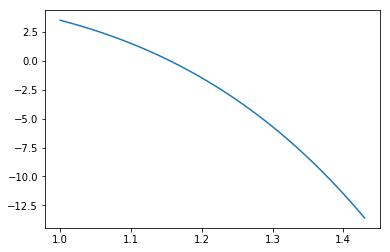

In [44]:
plt.plot(np.arange(a,b,0.01), P_n(np.arange(a,b,0.01)))

In [51]:
def trapezoidal(f, a, b, n):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций
    f - подынтегральная функция
    a, b - пределы интегрирования
    n - количество частичных отрезков
    """
    h = float(b - a)/n
    result = 0.5*(f(a) + f(b))
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

In [68]:
res1 = trapezoidal(P_n,a,b,1)

In [69]:
print("Решение, полученное методом трапеци:",res1)

Решение, полученное методом трапеци: -2.38135485379


In [71]:
def simpson(f, a, b, n):
    result = 0.0
    step = (b - a) / n
    for x in mlab.frange(a + step / 2, b - step / 2, step):
        result += step / 6 * (f(x - step / 2) + 4 * f(x) + f(x + step / 2))
    return result

In [72]:
res2 = simpson(P_n,a,b,1)

In [132]:
print("Решене, полученное методом Симпсона:",res2)

Решене, полученное методом Симпсона: -1.44273842409


In [75]:
print("\nПогрешность трапеций")
print(abs(real_res-res1))
print("Погрешность Симпсона")
print(abs(real_res-res2))


Погрешность трапеций
1.95320985379
Погрешность Симпсона
1.01459342409


 Оценка шагов интегрирования

In [103]:
def f1(x):
    return (7.9-0.4*x+2.7*x**2+0.7*x**3-2.4*x**4-2.7*x**5)

In [104]:
x = sy.symbols('x')
print(sy.diff(f1(x), x, 2))

-54.0*x**3 - 28.8*x**2 + 4.2*x + 5.4


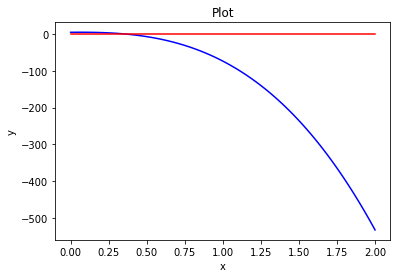

In [131]:
def d2f1(x):
    return -54.0*x**3 - 28.8*x**2 + 4.2*x + 5.4
xx=np.linspace(0,2,100)
yy=[d2f1(i) for i in xx]
Ox=0*xx
fig,ax=plt.subplots()
ax.plot(xx,yy,color="blue",label="y1")
ax.plot(xx,Ox,color="red",label="Ox")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot")
plt.show()

In [106]:
M2=d2f1(1.44)
hTr=((0.0001*12)/(M2*(1.44-1)))**1/2
print("Высота для трапеций")
print(hTr)

Высота для трапеций
-6.508543833178672e-06


In [107]:
x = sy.symbols('x')
print(sy.diff(f1(x), x, 4))

-(324.0*x + 57.6)


In [109]:
def d4f1(x):
    -(324.0*x + 57.6)

In [110]:
M4=d4f1(1.44)
hSim=((0.0001*2880)/(M2*(1.44-1)))**1/2
print("Высота для трапеций")
print(hSim)

Высота для трапеций
-0.0015620505199628813


In [111]:
nTr=round((1.44-1)/hTr)
nSim=round((1.44-1)/hSim)
print("Кол-во шагов для трапеций")
print(nTr)
print("Кол-во шагов для Симпсона")
print(nSim)

Кол-во шагов для трапеций
-67603
Кол-во шагов для Симпсона
-282


In [117]:
Res1New=trapezoidal(f1,1,1.44,nTr)
print("Результат трапеций")
print(S1New)
Res2New=simpson(f1,1,1.44,nSim)
print("\nРезультат Симпсона")
print(S2New)

Результат трапеций
2.0255829678943233e-05

Результат Симпсона
0.0


In [118]:
print("\nПогрешность трапеций")
print(abs(real_res-Res1New))
print("Погрешность Симпсона")
print(abs(real_res-Res2New))


Погрешность трапеций
0.42816525582967896
Погрешность Симпсона
0.428145


### Задача 8.3.

Вычислить значение интеграла  $\int_a^{b} f(x),\mathrm{d}x$  аналитически и,  используя формулу центральных прямоугольников,  с шагами $h : \frac{b-a}{2}, \frac{b-a}{3} ,… \frac{b-a}{20}$ . При указанных значениях $h$  найти абсолютную погрешность  и оценки теоретической абсолютной погрешности. На одном чертеже построить графики найденных погрешностей.

#### $f(x)= x^2(sin(\sqrt[3]{x})-3)$
### $a = 0.5$
### $b = 1.5$

In [94]:
def f(x):
    return x**2*(np.sin(x**(1/3) - 3))
a2=0.5
b2=1.5

In [95]:
import scipy
from scipy import integrate
scipy.integrate.quad(f,a2,b2)

(-0.9998497691772454, 1.110056234906726e-14)

In [96]:
res=-0.9998497691772454

In [141]:
def illustrate_func(x_range, func):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(x_range, func(x_range))
    plt.grid(True)

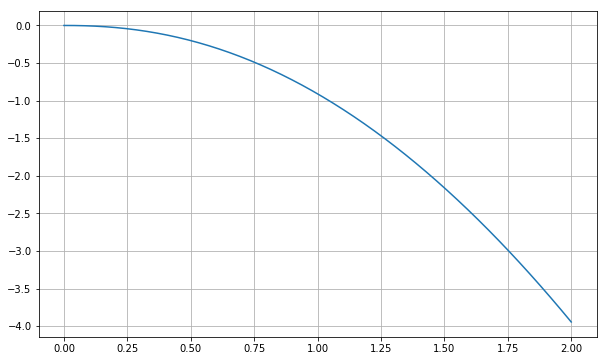

In [142]:
illustrate_func(np.linspace(0.0, 2.0), f)

In [101]:
""" 
f - подынтегральная функция
a, b - пределы интегрирования
n - количество шагов 
"""
def center_rectangles(f, a, b, n):
    h=float((b-a)/n)
    result = 0
    for i in range(1, n+1):
        result += f(a + i*h-0.5*h)
    result *= h
    return result

In [102]:
for i in range(2,21):
    print(center_rectangles(f, a2, b2,i))

-0.977335552646
-0.989855023058
-0.994230086531
-0.996253882755
-0.997352895954
-0.99801545192
-0.998445429937
-0.998740200318
-0.998951037266
-0.999107027079
-0.999225666883
-0.999317994608
-0.999391252622
-0.999450352669
-0.999498721208
-0.999538807516
-0.999572399985
-0.999600829114
-0.999625101316


In [126]:
arr1 = np.zeros(19)
for i in range(2,21):
    arr1[i-2] = (np.fabs(center_rectangles(f, a2, b2,i)-res))
arr2 = np.zeros(19)
for i in range(2,21):
    arr2[i-2] = (i)
arr3=np.zeros(19)
for i in range(2,21):
    arr3[i-2] = (M2*(b2-a2)*((b2-a2)/i)**2/24)

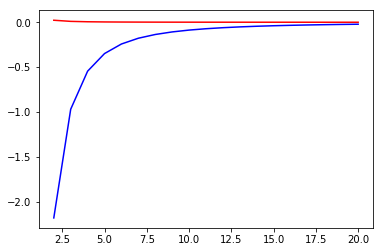

In [129]:
plt.plot(arr2,arr1,color='r')
plt.plot(arr2,arr3,color='b')

In [130]:
scipy.integrate.quad(f,a2,b2)

(-0.9998497691772454, 1.110056234906726e-14)